<a href="https://colab.research.google.com/github/sseo1124/Fall2022-Daily-Leetcode/blob/main/PetFinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
!pwd


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle competitions download -c petfinder-adoption-prediction

In [ ]:
!unzip "/content/petfinder-adoption-prediction.zip"

In [ ]:
import pandas as pd

breeds = pd.read_csv('/content/breed_labels.csv')
colors = pd.read_csv("/content/color_labels.csv")
states = pd.read_csv("/content/StateLabels.csv")

train = pd.read_csv("/content/train/train.csv")
test = pd.read_csv("/content/test/test.csv")
sub = pd.read_csv("/content/test/sample_submission.csv")

train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
all_data = pd.concat([train, test])


In [ ]:
all_data.drop("Description", axis = 1).head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,dataset_type
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,86e1089a3,1.0,2.0,train
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,6296e909a,2.0,0.0,train
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7.0,3.0,train
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8.0,2.0,train
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3.0,2.0,train


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Adoption speed classes rates')

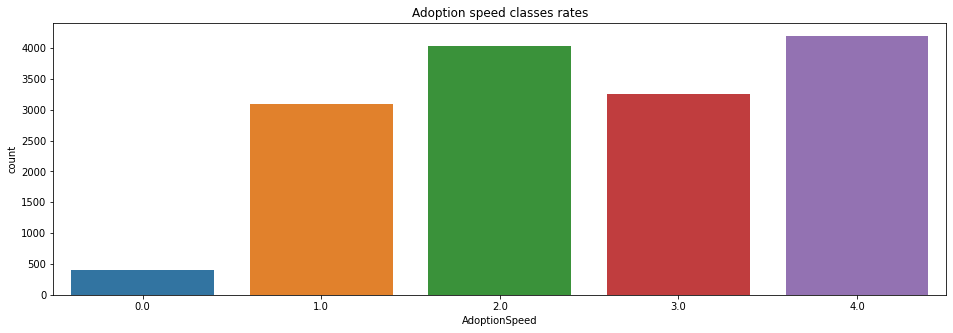

In [ ]:
plt.figure(figsize = (16, 5));
g = sns.countplot(x = "AdoptionSpeed", data = all_data.loc[all_data['dataset_type'] == 'train'])
plt.title('Adoption speed classes rates')


**Type**
1-Dog, 2-Cat

Text(0.5, 1.0, 'Number of cats and dogs in train and test datat')

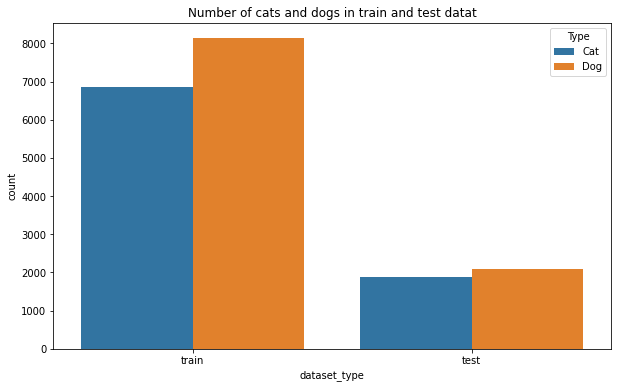

In [ ]:
all_data['Type'] = all_data['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
plt.figure(figsize=(10, 6));
sns.countplot(x = 'dataset_type', data = all_data, hue = 'Type');
plt.title('Number of cats and dogs in train and test datat')

train 과 test set에서 둘 다 dog가 많이 입양됨
train에서 차이가 크긴하지만 serious 한 difference는 아닌듯 함

In [ ]:
main_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prepare_plot_dict(df, col, main_count):
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_count_plot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points')  

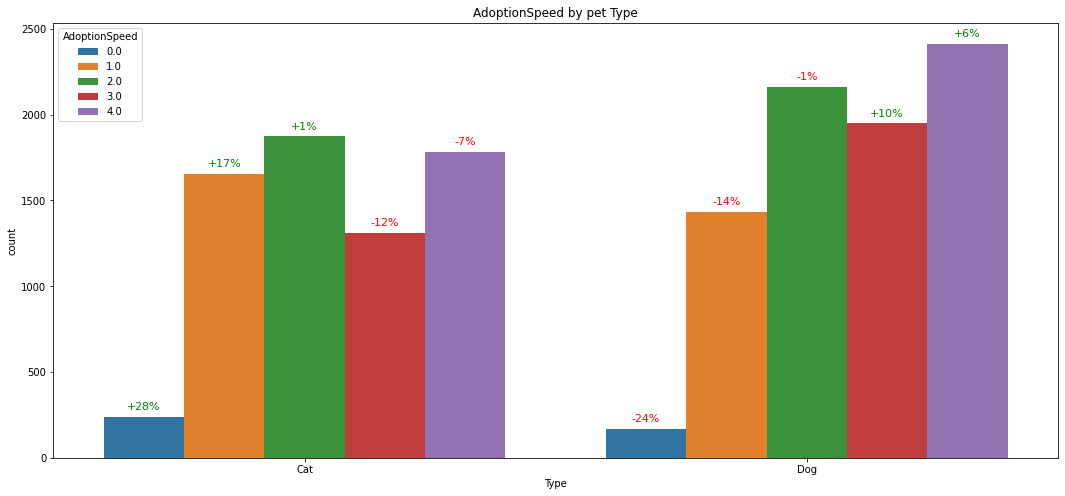

In [ ]:
plt.figure(figsize=(18, 8));
make_count_plot(df=all_data.loc[all_data['dataset_type'] == 'train'], x='Type', title='by pet Type')

**Age**

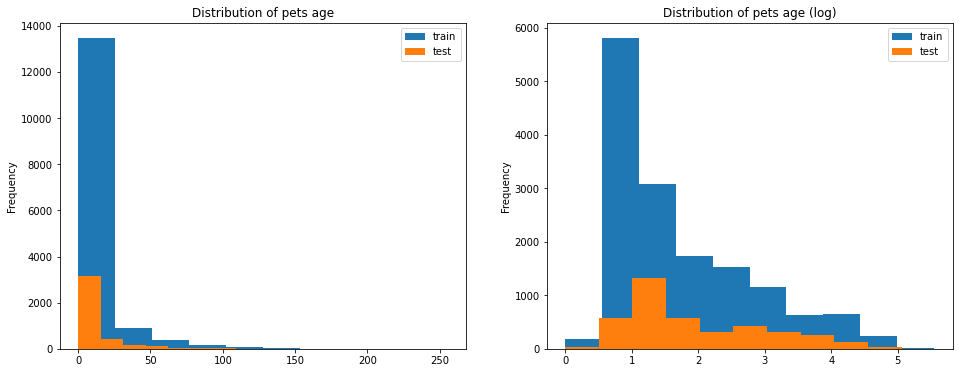

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of pets age');
train['Age'].plot(kind ='hist', label='train');
test['Age'].plot(kind ='hist', label='test');
plt.legend();

plt.subplot(1, 2, 2)
plt.title('Distribution of pets age (log)');
np.log1p(train['Age']).plot(kind = 'hist', label='train');
np.log1p(test['Age']).plot(kind = 'hist', label='test');
plt.legend();

adopted pets are young 

In [ ]:
train['Age'].value_counts().head(15)

2     3503
1     2304
3     1966
4     1109
12     967
24     651
5      595
6      558
36     417
8      309
7      281
48     241
60     199
9      184
0      179
Name: Age, dtype: int64

In [ ]:
max(train['Age'])

255

[(0.0, 60.0)]

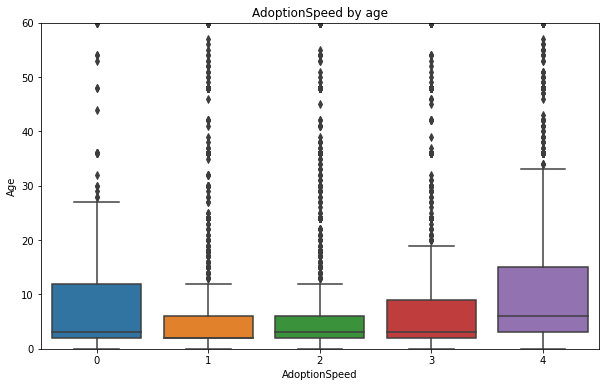

In [ ]:
plt.figure(figsize=(10, 6));
sns.boxplot(x="AdoptionSpeed", y="Age", data=train);
plt.title('AdoptionSpeed by age');
plt.ylim(0, 60);
ax.set(ylim = (0, 60))

**Breeds**

In [ ]:
train['Pure_breed'] = 0
train.loc[train['Breed2'] == 0, 'Pure_breed'] = 1
test['Pure_breed'] = 0
test.loc[test['Breed2'] == 0, 'Pure_breed'] = 1
all_data['Pure_breed'] = 0
all_data.loc[all_data['Breed2'] == 0, 'Pure_breed'] = 1

print(f"Rate of pure breed pets in train data: {train['Pure_breed'].sum() * 100 / train['Pure_breed'].shape[0]:.4f}%.")
print(f"Rate of pure breed pets in test data: {test['Pure_breed'].sum() * 100 / test['Pure_breed'].shape[0]:.4f}%.")

Rate of pure breed pets in train data: 71.7802%.
Rate of pure breed pets in test data: 74.6979%.


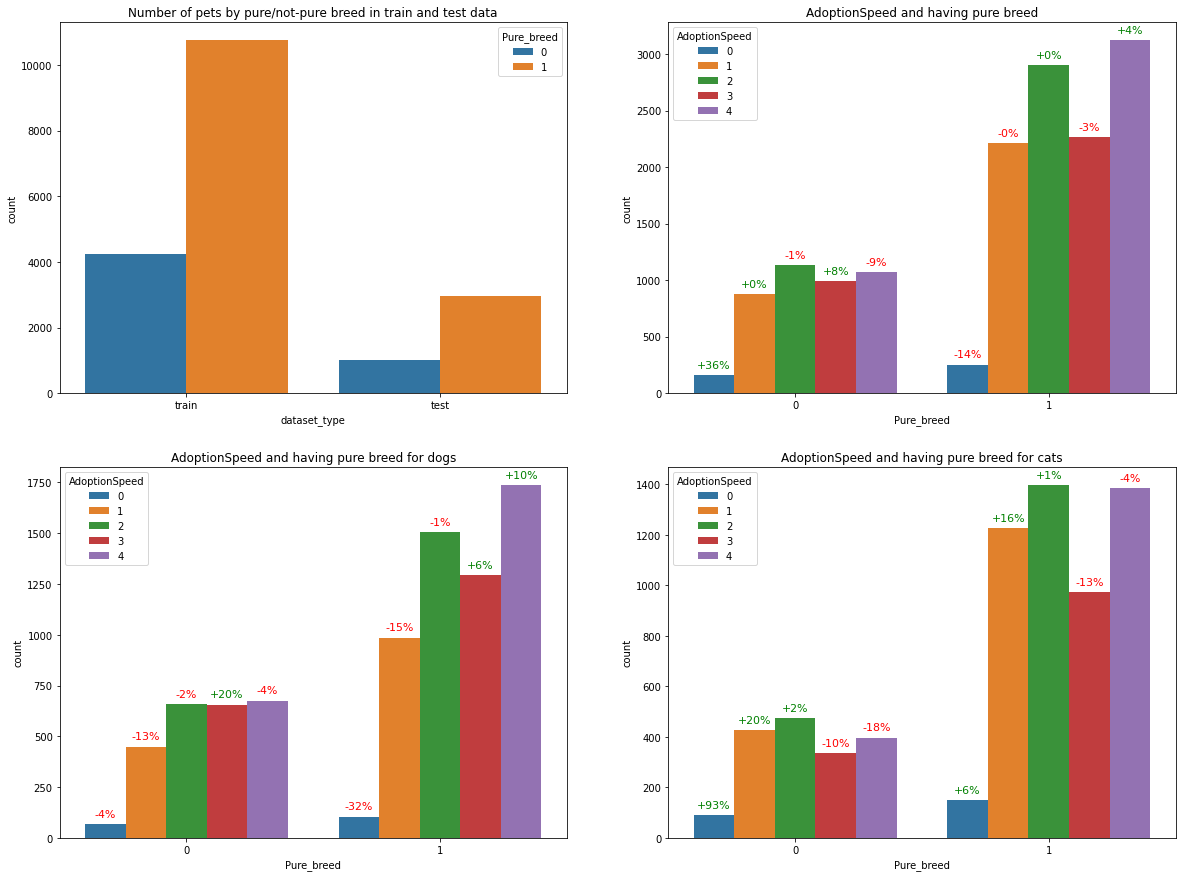

In [ ]:
def plot_four_graphs(col='', main_title='', dataset_title=''):
 
    plt.figure(figsize=(20, 15));
    plt.subplot(2, 2, 2)
    make_count_plot(df=train, x=col, title=f'and {main_title}')

    plt.subplot(2, 2, 1)
    sns.countplot(x='dataset_type', data=all_data, hue=col);
    plt.title(dataset_title);

    plt.subplot(2, 2, 3)
    make_count_plot(df=train.loc[train['Type'] == 1], x=col, title=f'and {main_title} for dogs')

    plt.subplot(2, 2, 4)
    make_count_plot(df=train.loc[train['Type'] == 2], x=col, title=f'and {main_title} for cats')
    
plot_four_graphs(col='Pure_breed', main_title='having pure breed', dataset_title='Number of pets by pure/not-pure breed in train and test data')

non-pure breed pet 이 빨리 더 많이 adopted

***Gender**
1 = Male, 2 = Female, 3 =Mixed

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


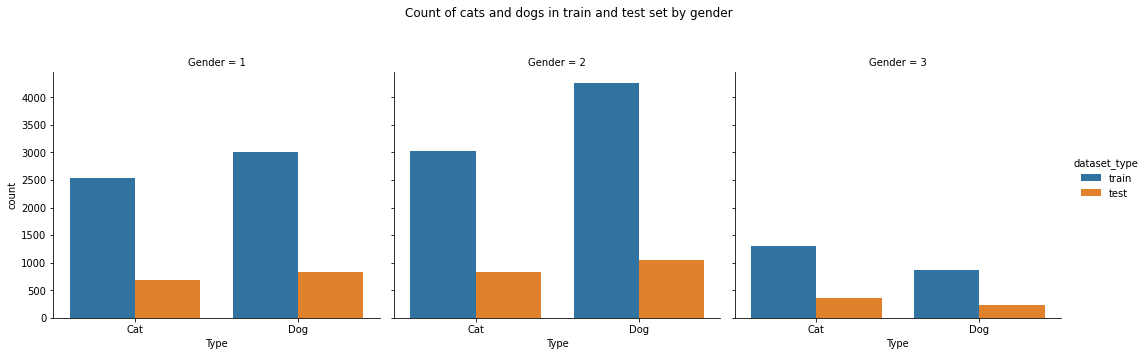

In [ ]:
sns.factorplot('Type', col='Gender', data=all_data, kind='count', hue='dataset_type');
plt.subplots_adjust(top=0.8)
plt.suptitle('Count of cats and dogs in train and test set by gender');

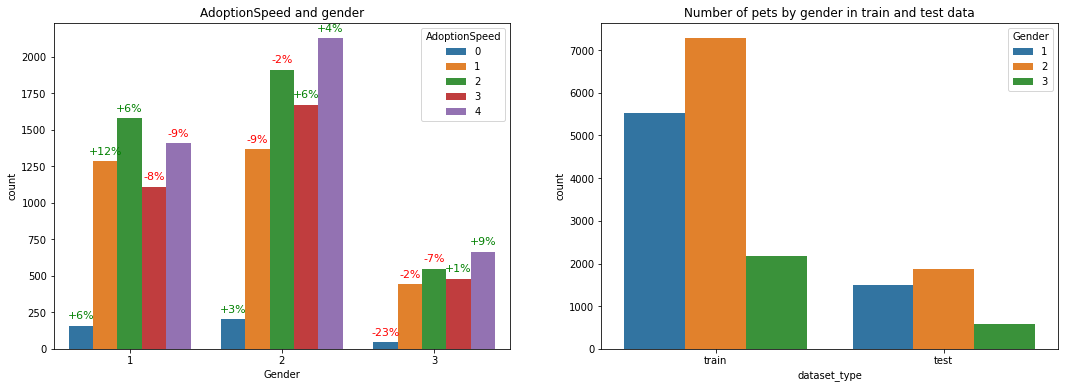

In [ ]:
plt.figure(figsize=(18, 6));
plt.subplot(1, 2, 1)
make_count_plot(df=train, x='Gender', title='and gender')

plt.subplot(1, 2, 2)
sns.countplot(x='dataset_type', data=all_data, hue='Gender');
plt.title('Number of pets by gender in train and test data');

In [ ]:
len(train["AdoptionSpeed"])

14993